Data Mining: Basic Concepts - Winter 2023/24
---------------
``` 
> University of Konstanz 
> Department of Computer and Information Science
> Maximilian T. Fischer, Frederik Dennig, Yannick Metz, Udo Schlegel
```
__Organize in teams of 2 people, return the exercise on time using ILIAS__

---

Assignment 08 in Python 
---------------
- ___Please put your names and student IDs here___:
    - _Name_, _Student ID_
    - _Name_, _Student ID_

---

#### Excercise 1: Lazy vs Eager: Theory

**a) Explain the difference between an eager learner and a lazy learner.**

While an eager learner learns an abstract model based on a training set, which it uses to classify new observations, lazy learners store data tuples and classify newly encountered tuples based on the already stored data tuples.

**b) Provide an example of a machine learning algorithm that is an eager learner and one that is a lazy learner.**

Let's assume a classification context. Decision Trees would be an example of an eager learner - first they are trained on a training set, forming decision rules. Newly encountered observations are then classified based on these learned decision rules.

An example of a lazy learner would be k-Nearest Neighbor (kNN) classification: upon encountering a new tuple, the k known tuples with the shortest distance to the new tuple are detected & their most common class is assigned to the new tuple.

*You are given a dataset with 1 million rows and 10 columns. You need to build a machine learning model to predict a binary outcome based on the values in the columns. You have two options: a decision tree or a k-nearest neighbors algorithm.*
  
**b) Which algorithm should you choose and why? Explain your reasoning in detail, taking into account the size and complexity of the dataset and the computational resources available to you.**

* *Computational resources (esp. memory)*
* *Interpretability*

#### Excercise 2: Lazy vs Eager: Practical

In this exercise, we want to implement a basic k-nearest neighbor algorithm.   
For this, we need a similarity function and a general k-nearest neighbor function.  
We will use the breast cancer dataset we previously used for the SVM with an 80/20 train test split.    
  
**Please implement the k-nearest neighbor algorithm on your own and show that the implementation works for the breast cancer data.**  
_(Hint: use the `sklearn.model_selection.train_test_split` method and the parameter `random_state=0`)_

In [26]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df = (df - df.min()) / (df.max() - df.min())
df['diagnosis'] = data.target

features = list(data.feature_names)

train, test = train_test_split(df, test_size=0.2, random_state=0)

In [144]:
# Performance is bad, but it is made with passion:

class KNNClassifier:

    predictions = []

    def __init__(self, k: int) -> None:
        self.k = k

    def train(self, train_features: pd.DataFrame, train_target: pd.Series) -> None:
        self.train_features = train_features
        self.train_target = train_target

    def __euclidean_dist(self, new_tup, known_tup):
        return np.sqrt(sum((new_tup - known_tup)**2))
    
    def predict(self, test_features: pd.DataFrame) -> list:
        
        predictions = []

        for _, row in test_features.iterrows():
            # find closest rows:
            distances = [self.__euclidean_dist(row, xrow) for _, xrow in self.train_features.iterrows()]
            ids = sorted(range(len(distances)), key=lambda sub: distances[sub])[:self.k]
            # find their classes & store most frequent one:
            values = self.train_target.iloc[ids]
            prediction = values.mode()[0]
            predictions.append(prediction)


        self.predictions = predictions
        return predictions
    
    def evaluate(self, test_target: pd.Series) -> float:
        return sum(self.predictions == test_target) / len(test_target)
    

In [151]:
errors = []
for K in range(1,21):
    knn = KNNClassifier(k=K)
    knn.train(train[features], train["diagnosis"])
    knn.predict(test[features])
    error = 1 - knn.evaluate(test["diagnosis"])
    errors.append({"k": K, "error": error})

<Axes: xlabel='k', ylabel='error'>

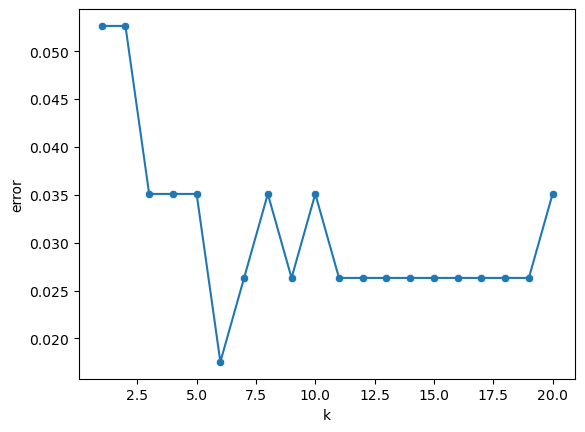

In [153]:
import seaborn as sns
sns.lineplot(data=pd.DataFrame(errors), x="k", y="error")
sns.scatterplot(data=pd.DataFrame(errors), x="k", y="error")

#### Excercise 3: Evaluation Metrics Theory

**a) Explain why different evaluation metrics are used for evaluating the performance of classifiers.**

**b) Provide examples of common evaluation metrics for classification algorithms, and explain the strengths and limitations of each metric in the context of classifier evaluation.**

**c) Explain how a perfect precision-recall curve looks like.**

#### Excercise 4: Evaluation Metrics Practical

After thinking about the different evaluation metrics, we want to see them in real-world scenarios and inspect their workings.  
We tackle two datasets for this task and use the machine learning algorithms we have already explored.  
The first dataset will be the breast cancer dataset again. The second one will be the cover-type forest dataset.  
Both datasets have unique properties and need special care. Handling different data is not always easy and selecting proper algorithms is even more challenging.
Thus, we focus on the different evaluation metrics to select one good working algorithm.  
In this case, we will compare the sci-kit learn implementations of Naive Bayes, Decision Trees, SVMs, and k-Nearest Neighbors based on the classification accuracy and F1-score.  
  
As the cover type data has more than two classes, we will only use the second and third class samples.  
  
**Please implement a comparison between the sci-kit learn implementations of Naive Bayes, Decision Trees, SVMs, and k-Nearest Neighbors on the breast cancer data and cover type data for your own implementation of accuracy and F1-score.**    
_(Hint: use the `sklearn.model_selection.train_test_split` method and the parameter `random_state=0`)_  
_(Hint: use the `sklearn.naive_bayes.GaussianNB`, `sklearn.tree.DecisionTreeClassifier`, `sklearn.svm.SVC`, `sklearn.neighbors.KNeighborsClassifier` methods with default parameters)_  

In [ ]:
from sklearn.datasets import fetch_covtype
data = fetch_covtype()

target = data['target'][np.logical_or(data['target'] == 2, data['target'] == 3)] - 2
data = data['data'][np.logical_or(data['target'] == 2, data['target'] == 3)]
